In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, mean_squared_error

from scipy.stats import zscore

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
parkinson = pd.read_csv("parkinsons.data")
parkinson.head().T

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284
MDVP:Jitter(Abs),7e-05,8e-05,9e-05,9e-05,0.00011
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


In [3]:
parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [6]:
parkinson.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
# MDVP:Fo(Hz), MDVP:Fhi(Hz) and MDVP:Flo(Hz), HNR -- most data are laying far from the mean

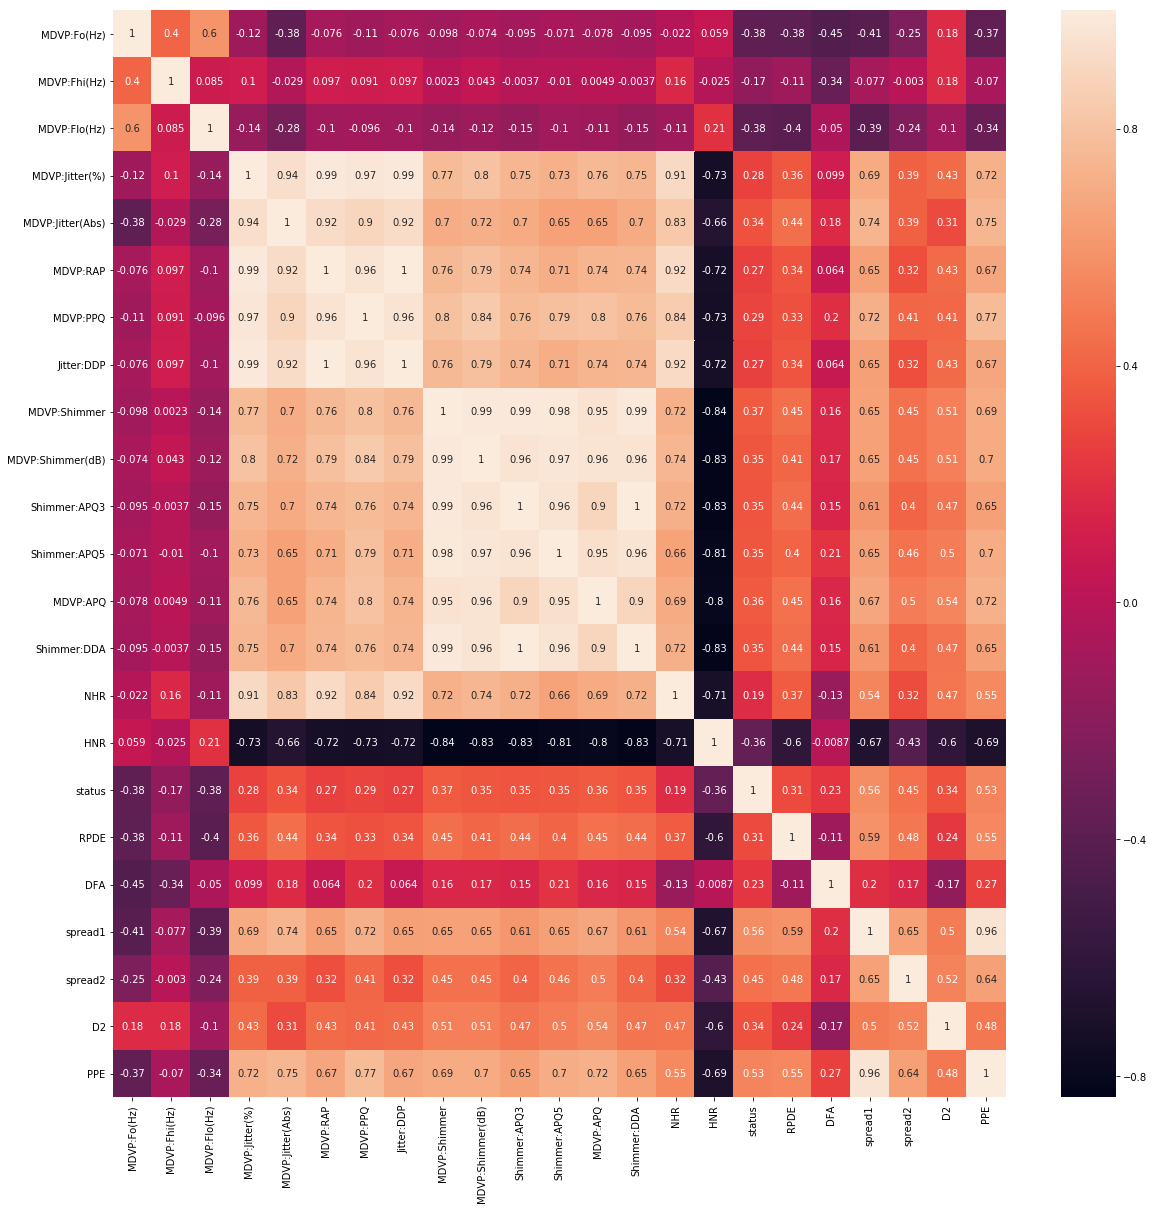

In [8]:
corr = parkinson.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

In [9]:
parkinson.var()

MDVP:Fo(Hz)         1.713137e+03
MDVP:Fhi(Hz)        8.370703e+03
MDVP:Flo(Hz)        1.894113e+03
MDVP:Jitter(%)      2.350440e-05
MDVP:Jitter(Abs)    1.212565e-09
MDVP:RAP            8.807685e-06
MDVP:PPQ            7.611952e-06
Jitter:DDP          7.926954e-05
MDVP:Shimmer        3.555839e-04
MDVP:Shimmer(dB)    3.797716e-02
Shimmer:APQ3        1.030867e-04
Shimmer:APQ5        1.445695e-04
MDVP:APQ            2.871919e-04
Shimmer:DDA         9.277580e-04
NHR                 1.633651e-03
HNR                 1.958739e+01
status              1.865186e-01
RPDE                1.080388e-02
DFA                 3.062054e-03
spread1             1.188553e+00
spread2             6.956521e-03
D2                  1.465351e-01
PPE                 8.121492e-03
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B3B7A20>,
      dtype=object)

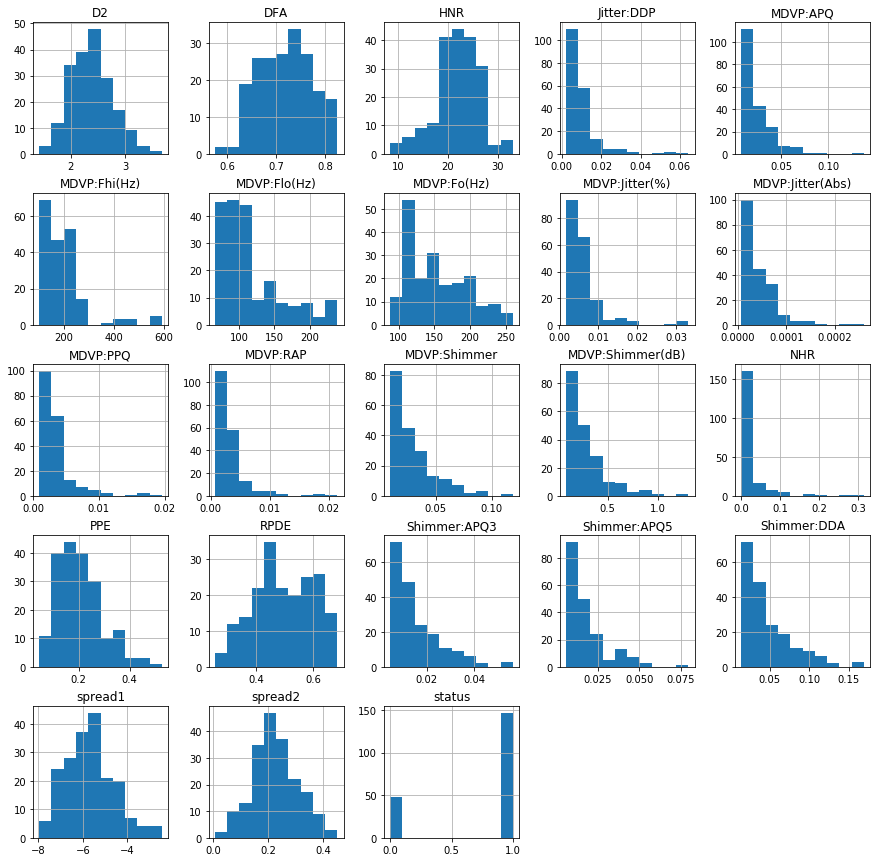

In [10]:
parkinson.hist(figsize = (15,15))

In [11]:
# MDVP:Fhi(Hz)  -- having most outlier
# MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Fo(Hz), RPDE, DFA, HNR -- not normally distributed
# All most all data are right skewed and having less outliers
# HNR -- left skewed

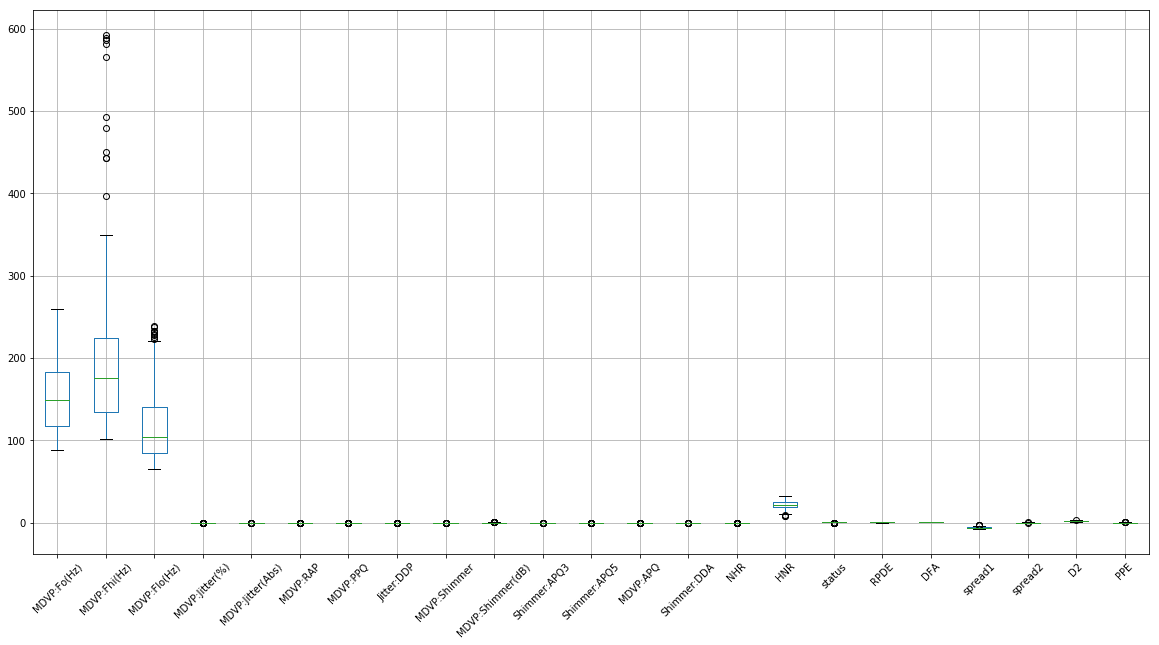

In [12]:
parkinson.boxplot(figsize = (20,10), rot=45)

In [13]:
# MDVP:Fhi(HZ) and MDVP:Flo(Hz) --- has outlier

In [14]:
parkinson = parkinson.drop('name', axis=1)
X=parkinson.drop('status', axis=1)
Y=parkinson['status']

In [17]:
X = X.apply(zscore)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

In [19]:
modelDefault = DecisionTreeClassifier(random_state=0)
modelDefault.fit(x_train,y_train)

parameter={'max_depth':np.arange(1,100),'criterion' : ['entropy','gini']}  
GS=GridSearchCV(modelDefault, parameter, cv=3)                                          
GS.fit(x_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2, ..., 98, 99]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [21]:
dtc=DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [22]:
y_predict=dtc.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_predict)
accuracy

0.847457627118644

In [23]:
cr = metrics.classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.95      0.85      0.90        46

   micro avg       0.85      0.85      0.85        59
   macro avg       0.78      0.85      0.80        59
weighted avg       0.88      0.85      0.86        59



In [27]:
# Using Decision Tree regularization, accuracy can be optimized

tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 7, min_samples_leaf = 2, random_state=0)
tree.fit(x_train, y_train)
y_predict_reg=tree.predict(x_test)
accuracy_reg = metrics.accuracy_score(y_test, y_predict_reg)    
accuracy_reg

0.9491525423728814

In [28]:
rfcDefault = RandomForestClassifier(random_state=0)
rfcDefault.fit(x_train, y_train)

parameter={'n_estimators': np.arange(1,10), 'max_depth':np.arange(1,10), 'criterion' : ['entropy','gini']}  
GS=GridSearchCV(rfcDefault,parameter,cv=3)                                          
GS.fit(x_train,y_train)

D:\Softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
GS.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 5}

In [30]:
rfc = RandomForestClassifier(n_estimators=5, max_depth=5, criterion='gini', random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
y_predict=rfc.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_predict)
accuracy

0.8305084745762712

In [33]:
forest = RandomForestClassifier(n_estimators=12, criterion = "gini", max_depth = 5,  random_state=0)
forest.fit(x_train, y_train)
y_predict_reg=forest.predict(x_test)
accuracy_reg = metrics.accuracy_score(y_test, y_predict_reg) 
accuracy_reg

# There are 12 optimal number of trees required to get the best result

0.9830508474576272